In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

# 1. Gather PNG filenames from MPT/resource folder
def gather_png_filenames(root_folder):
    png_files = []
    for root, dirs, files in os.walk(root_folder):
        if os.path.relpath(root, root_folder).count(os.sep) < 2:  # Restrict to two subdirectories
            # print(root)
            for file in files:
                if file.endswith(".png"):
                    png_files.append(os.path.join(root, file))
    return png_files
    

In [2]:
resource_folder = r'MPT\\resource'
puzzle_image_path = r'MPT\\lv12.png'

# Step 1: Gather PNG filenames from MPT/resource
png_files = gather_png_filenames(resource_folder)
len(png_files)

74

In [17]:
# 2. Load source images
def load_images(image_paths):
    images = []
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if img is not None:
            images.append((path, img))
        else:
            print(f'error : {path}')
    return images

source_images = load_images(png_files)

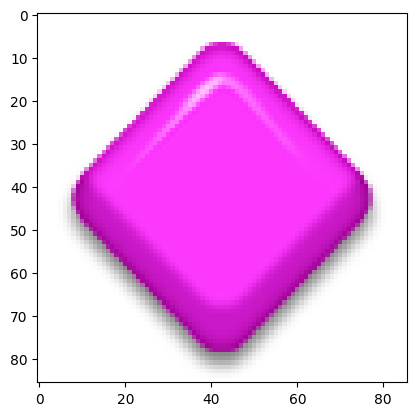

In [19]:
plt.imshow(np.array(source_images[2][2]))

In [20]:
len(source_images), len(source_images[0]), source_images[0][0], source_images[0][1].shape

(74, 2, 'MPT\\\\resource\\01_block\\PuzzleBlue.png', (86, 86, 4))

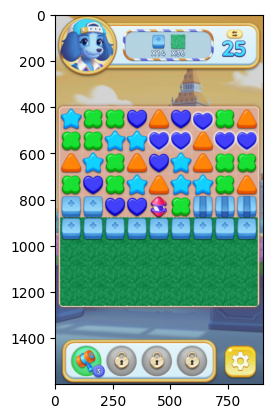

In [24]:
# 3. Load puzzle image
def load_puzzle_image(puzzle_path):
    puzzle_img = cv2.imread(puzzle_path, cv2.IMREAD_UNCHANGED)
    return puzzle_img

puzzle_img = load_puzzle_image(puzzle_image_path)
plt.imshow(puzzle_img)

In [ ]:
def template_match(puzzle_img, source_images):
    results = []
    
    for filename, template_img in source_images:
        # Perform template matching
        result = cv2.matchTemplate(puzzle_img, template_img, cv2.TM_CCOEFF_NORMED)
        threshold = 0.8  # You can adjust the threshold as needed
        loc = np.where(result >= threshold)
        
        # Draw bounding boxes on the matching locations
        for pt in zip(*loc[::-1]):  # Reverse the result coordinates (y, x)
            cv2.rectangle(puzzle_img, pt, (pt[0] + template_img.shape[1], pt[1] + template_img.shape[0]), (0, 255, 0), 2)
            results.append((filename, pt))
    
    return puzzle_img, results

result_img, matched_locations = template_match(puzzle_img, source_images)
    
# Display the result
cv2.imshow('Puzzle Image with Bounding Boxes', result_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Optional: Save the resulting image
cv2.imwrite('MPT/lv12_with_bboxes.png', result_img)

In [ ]:




# 4. Template match and draw bounding box
def template_match(puzzle_img, source_images):
    results = []
    
    for filename, template_img in source_images:
        # Perform template matching
        result = cv2.matchTemplate(puzzle_img, template_img, cv2.TM_CCOEFF_NORMED)
        threshold = 0.8  # You can adjust the threshold as needed
        loc = np.where(result >= threshold)
        
        # Draw bounding boxes on the matching locations
        for pt in zip(*loc[::-1]):  # Reverse the result coordinates (y, x)
            cv2.rectangle(puzzle_img, pt, (pt[0] + template_img.shape[1], pt[1] + template_img.shape[0]), (0, 255, 0), 2)
            results.append((filename, pt))
    
    return puzzle_img, results

# Main function to run the process
def main():
    # Folder paths
    resource_folder = r'MPT\\resource'
    puzzle_image_path = r'MPT\\lv12.png'
    
    # Step 1: Gather PNG filenames from MPT/resource
    png_files = gather_png_filenames(resource_folder)
    # print(png_files)

    # Step 2: Load source images
    source_images = load_images(png_files)
    
    """
    # Step 3: Load puzzle image
    puzzle_img = load_puzzle_image(puzzle_image_path)
    
    # Step 4: Template match and draw bounding boxes
    print('hi')
    result_img, matched_locations = template_match(puzzle_img, source_images)
    
    # Display the result
    cv2.imshow('Puzzle Image with Bounding Boxes', result_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    # Optional: Save the resulting image
    cv2.imwrite('MPT/lv12_with_bboxes.png', result_img)
    
    # Return matched locations for debugging if needed
    return matched_locations
    """
    
if __name__ == "__main__":
    matched_locations = main()
    print("Matched Locations:", matched_locations)
